<a href="https://colab.research.google.com/github/charan12345678/Flipkart/blob/master/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
#@title
!pip install geopandas
!pip install shapely

In [130]:
#@title
import pandas as pd
import geopandas as gpd
import requests
import shapely
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
#@title
delhi=gpd.read_file('new_delhi_wards.json')
delhi.head()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,CANT_1,DELHI CANTT CHARGE 1,1,"300 Ring Road, Block CB, Naraina Village, Nara...","POLYGON ((77.13228 28.63154, 77.13644 28.62062..."
1,CANT_2,DELHI CANTT CHARGE 2,2,"Unnamed Road, Delhi Cantonment, New Delhi","POLYGON ((77.15429 28.62335, 77.15501 28.62228..."
2,CANT_4,DELHI CANTT CHARGE 4,3,"Unnamed Road, Mahipalpur, New Delhi","POLYGON ((77.15755 28.57578, 77.15672 28.57564..."
3,CANT_5,DELHI CANTT CHARGE 5,4,"P-268/3, Rock View, Delhi Cantonment, Delhi","POLYGON ((77.13480 28.57051, 77.13429 28.57048..."
4,CANT_6,DELHI CANTT CHARGE 6,5,"Old Palam Road, Delhi Cantonment, New Delhi","POLYGON ((77.12157 28.59308, 77.12878 28.59029..."


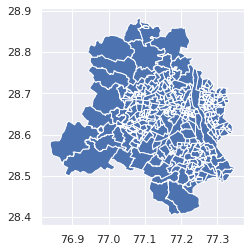

In [132]:
#@title
delhi.plot()

In [133]:
#@title
print(delhi.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   WARD_NO       289 non-null    object  
 1   WARD_NAME     289 non-null    object  
 2   MOVEMENT_ID   290 non-null    object  
 3   DISPLAY_NAME  290 non-null    object  
 4   geometry      290 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 11.5+ KB
None


In [134]:
print(delhi.geometry)

0      POLYGON ((77.13228 28.63154, 77.13644 28.62062...
1      POLYGON ((77.15429 28.62335, 77.15501 28.62228...
2      POLYGON ((77.15755 28.57578, 77.15672 28.57564...
3      POLYGON ((77.13480 28.57051, 77.13429 28.57048...
4      POLYGON ((77.12157 28.59308, 77.12878 28.59029...
                             ...                        
285    POLYGON ((77.06644 28.70141, 77.06574 28.70063...
286    POLYGON ((77.19404 28.67288, 77.19196 28.66855...
287    POLYGON ((77.09982 28.64496, 77.09947 28.64504...
288    POLYGON ((77.25834 28.71855, 77.25858 28.71785...
289    POLYGON ((77.08111 28.57601, 77.08554 28.57480...
Name: geometry, Length: 290, dtype: geometry


In [135]:
#@title
delhi_c=delhi.copy()
delhi_c.geometry= delhi_c['geometry'].centroid
delhi_c.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,CANT_1,DELHI CANTT CHARGE 1,1,"300 Ring Road, Block CB, Naraina Village, Nara...",POINT (77.13180 28.62141)
1,CANT_2,DELHI CANTT CHARGE 2,2,"Unnamed Road, Delhi Cantonment, New Delhi",POINT (77.14289 28.61059)
2,CANT_4,DELHI CANTT CHARGE 4,3,"Unnamed Road, Mahipalpur, New Delhi",POINT (77.14556 28.56317)
3,CANT_5,DELHI CANTT CHARGE 5,4,"P-268/3, Rock View, Delhi Cantonment, Delhi",POINT (77.13216 28.57656)
4,CANT_6,DELHI CANTT CHARGE 6,5,"Old Palam Road, Delhi Cantonment, New Delhi",POINT (77.10751 28.57027)


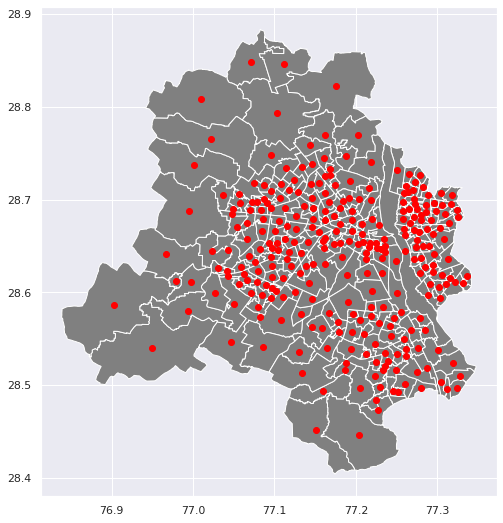

In [136]:
#@title
fig, ax = plt.subplots(figsize=(9,9))
delhi.plot(color='grey',ax=ax)
delhi_c.plot(color='red',ax=ax)

In [137]:
#@title
delhi1=gpd.read_file('new_delhi-wards-2019-1-All-HourlyAggregate.csv')
delhi1.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,72,101,18,3095.49,753.45,3010.42,1.26,None
1,62,201,18,3969.92,1206.61,3762.93,1.41,None
2,61,211,18,3513.05,972.2,3394.81,1.29,None
3,60,221,18,1973.63,722.65,1874.59,1.36,None
4,4,249,13,3916.21,658.27,3859.83,1.19,None


In [138]:
delhi1.dtypes

sourceid                                      object
dstid                                         object
hod                                           object
mean_travel_time                              object
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time      object
geometry                                    geometry
dtype: object

In [139]:
delhi1["mean_travel_time"] = delhi1["mean_travel_time"].astype(float)
print(delhi1.dtypes)

sourceid                                      object
dstid                                         object
hod                                           object
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time      object
geometry                                    geometry
dtype: object


In [140]:
import os, sys
from scipy import stats
import numpy as np
delhi1['geometric_mean_travel_time'].replace("None", np.nan, inplace=True)
delhi1['standard_deviation_travel_time'].replace("None", np.nan, inplace=True)
delhi1['geometric_standard_deviation_travel_time'].replace("None", np.nan, inplace=True)

In [141]:
delhi1['geometric_mean_travel_time'] = delhi1['geometric_mean_travel_time'].replace(np.nan, 0)
delhi1['standard_deviation_travel_time'] = delhi1['standard_deviation_travel_time'].replace(np.nan, 0)
delhi1['geometric_standard_deviation_travel_time'] = delhi1['geometric_standard_deviation_travel_time'].replace(np.nan, 0)
delhi1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,72,101,18,3095.49,753.45,3010.42,1.26,None
1,62,201,18,3969.92,1206.61,3762.93,1.41,None
2,61,211,18,3513.05,972.2,3394.81,1.29,None
3,60,221,18,1973.63,722.65,1874.59,1.36,None
4,4,249,13,3916.21,658.27,3859.83,1.19,None
...,...,...,...,...,...,...,...,...
1470140,160,212,4,630.11,324.78,587.69,1.39,None
1470141,192,63,18,1856.24,522.47,1795.91,1.28,None
1470142,82,139,1,2289.94,953.39,2162.88,1.37,None
1470143,15,248,19,1775.83,693.55,1662.15,1.43,None


In [142]:
delhi1["geometric_standard_deviation_travel_time"] = delhi1["geometric_standard_deviation_travel_time"].astype(float)
print(delhi1.dtypes)

sourceid                                      object
dstid                                         object
hod                                           object
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object


In [143]:
delhi1["geometric_mean_travel_time"] = delhi1["geometric_mean_travel_time"].astype(float)
print(delhi1.dtypes)

sourceid                                      object
dstid                                         object
hod                                           object
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                   float64
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object


In [144]:
delhi1["hod"] = delhi1["hod"].astype(int)
print(delhi1.dtypes)

sourceid                                      object
dstid                                         object
hod                                            int64
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                   float64
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object


In [145]:
delhi1['hod']=pd.cut(delhi1.hod,
                    bins=[0,4,8,12,16,24],
                    labels=['Latenight','Early_morning','morning','afternoon','evening'])

In [146]:
corr = delhi1.corr() #plot with actual values
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,mean_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
mean_travel_time,1.00,1.00,-0.46
geometric_mean_travel_time,1.00,1.00,-0.48
geometric_standard_deviation_travel_time,-0.46,-0.48,1.00


In [147]:
sns.set()
cols = ['mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time','geometric_standard_deviation_travel_time']
#sns.pairplot(delhi1[cols], size = 2.5)
#plt.show()

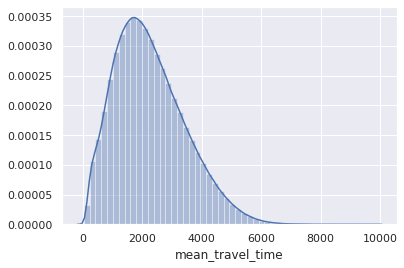

In [148]:
#@title
sns.distplot(delhi1["mean_travel_time"])

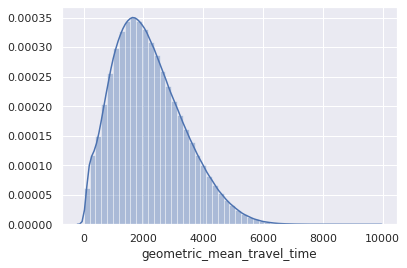

In [149]:
sns.distplot(delhi1['geometric_mean_travel_time'])

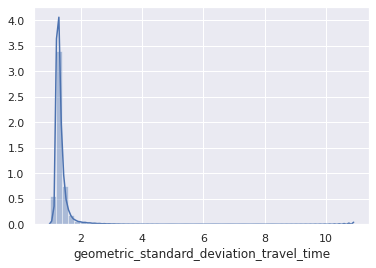

In [150]:
sns.distplot(delhi1['geometric_standard_deviation_travel_time'])

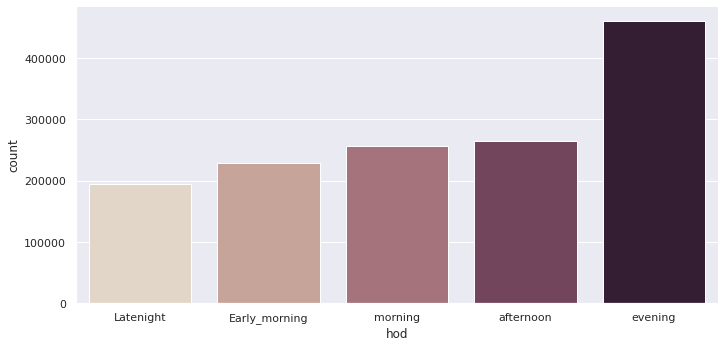

In [153]:
sns.catplot(x = "hod", kind = "count", palette = "ch: 0.25", data = delhi1,aspect = 2)

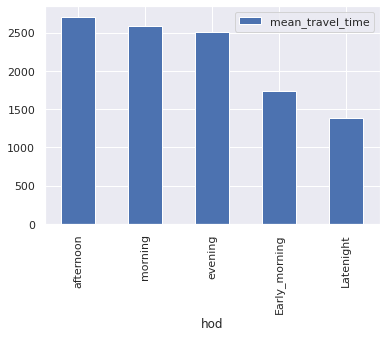

In [154]:
delhi1[['mean_travel_time', 'hod']].groupby(['hod']).mean().sort_values("mean_travel_time", ascending = False).plot.bar()

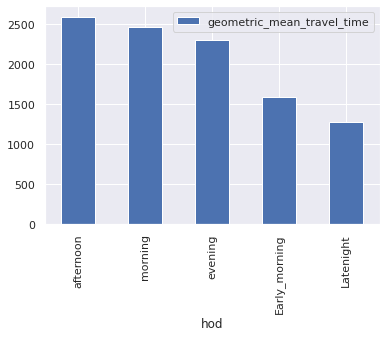

In [155]:
delhi1[['geometric_mean_travel_time', 'hod']].groupby(['hod']).median().sort_values("geometric_mean_travel_time", ascending = False).plot.bar()

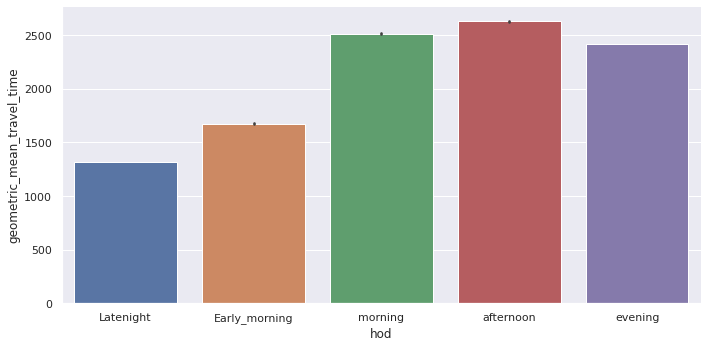

In [156]:
sns.catplot(x='hod',y='geometric_mean_travel_time',kind='bar',data=delhi1,aspect=2)

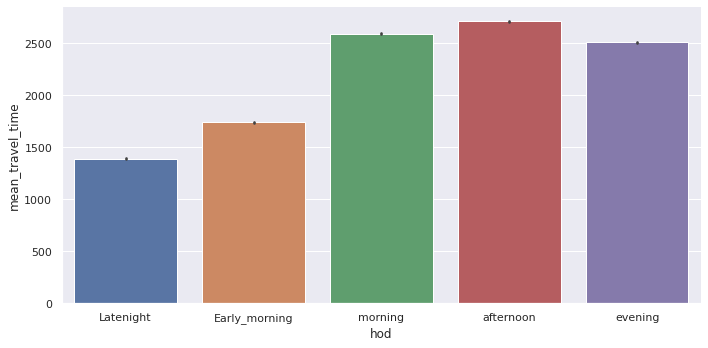

In [157]:
sns.catplot(x='hod',y='mean_travel_time',kind='bar',data=delhi1,aspect=2)

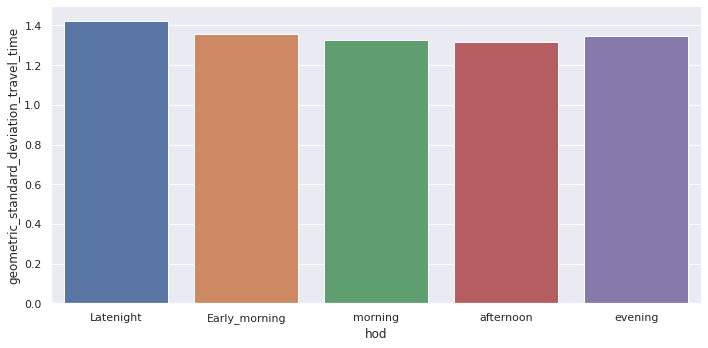

In [158]:
sns.catplot(x='hod',y='geometric_standard_deviation_travel_time',kind='bar',data=delhi1,aspect=2)

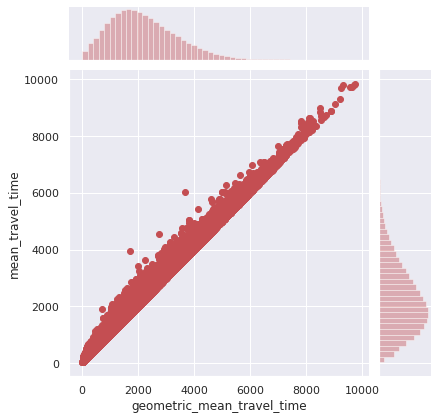

In [159]:
sns.jointplot(x='geometric_mean_travel_time',y='mean_travel_time',data=delhi1,kind='scatter',color='r')

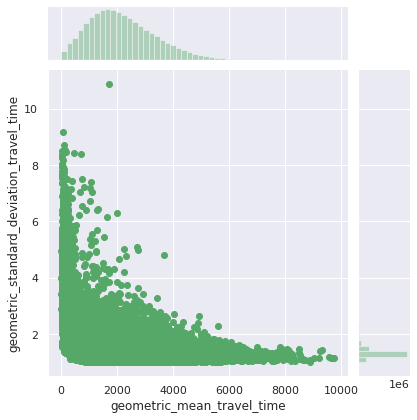

In [160]:
sns.jointplot(x='geometric_mean_travel_time',y='geometric_standard_deviation_travel_time',data=delhi1,kind='scatter',color='g')

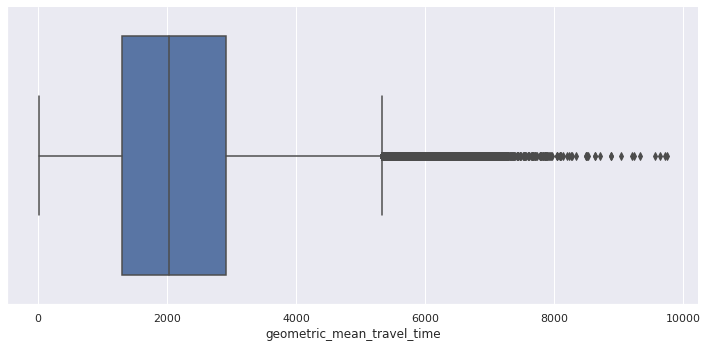

In [161]:
sns.catplot(x='geometric_mean_travel_time', kind='box',data=delhi1, aspect=2)


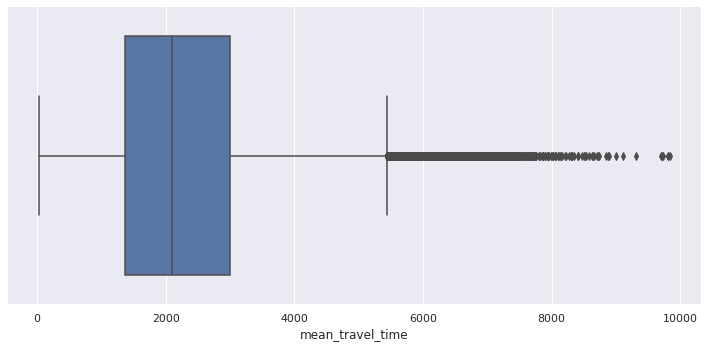

In [162]:
sns.catplot(x='mean_travel_time', kind='box',data=delhi1, aspect=2)

In [163]:
delhi_c.dtypes

WARD_NO           object
WARD_NAME         object
MOVEMENT_ID       object
DISPLAY_NAME      object
geometry        geometry
dtype: object

In [164]:
delhi_c["WARD_NO"] = delhi_c["WARD_NO"].astype(str)
delhi_c['WARD_NAME'] = delhi_c['WARD_NAME'].astype('|S')
##bglr_c[""] = bglr_c["WARD_NAME"].astype(str)
##bglr_c['WARD_NAME'].astype(str)
delhi_c["MOVEMENT_ID"] = delhi_c["MOVEMENT_ID"].astype(float)
delhi_c['DISPLAY_NAME'].astype(str)
##bglr_c["DISPLAY_NAME"] = bglr_c["DISPLAY_NAME"].astype(str).astype(float)
delhi_c['geometry'].astype(str)
print(delhi_c.dtypes)

WARD_NO           object
WARD_NAME         object
MOVEMENT_ID      float64
DISPLAY_NAME      object
geometry        geometry
dtype: object


In [165]:
weekly_delhi = pd.read_csv('new_delhi-wards-2019-1-WeeklyAggregate.csv')
weekly_delhi.head

<bound method NDFrame.head of         sourceid  ...  geometric_standard_deviation_travel_time
0            191  ...                                      1.44
1             47  ...                                      1.46
2            274  ...                                      1.43
3            194  ...                                      1.54
4             67  ...                                      1.56
...          ...  ...                                       ...
484898       136  ...                                      1.44
484899       126  ...                                      1.36
484900       112  ...                                      1.36
484901       113  ...                                      1.26
484902        28  ...                                      1.46

[484903 rows x 7 columns]>

In [166]:
weekly_delhi.columns

Index(['sourceid', 'dstid', 'dow', 'mean_travel_time',
       'standard_deviation_travel_time', 'geometric_mean_travel_time',
       'geometric_standard_deviation_travel_time'],
      dtype='object')

In [167]:
weekly_delhi.dtypes

sourceid                                      int64
dstid                                         int64
dow                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
dtype: object

In [168]:
weekly_delhi.shape

(484903, 7)

In [169]:
#weekly_delhi['mean_travel_time']=weekly_delhi['mean_travel_time']/60
#weekly_delhi['standard_deviation_travel_time']=weekly_delhi['standard_deviation_travel_time']/60
#weekly_delhi['geometric_mean_travel_time']=weekly_delhi['geometric_mean_travel_time']/60



In [170]:
weekly_delhi['mean_travel_time'].head

<bound method NDFrame.head of 0         1554.91
1         1843.00
2         3369.25
3         2063.48
4         2661.10
           ...   
484898    1865.87
484899    2275.35
484900    2804.33
484901    3794.86
484902    4640.91
Name: mean_travel_time, Length: 484903, dtype: float64>

In [171]:
#weekly_delhi.describe()

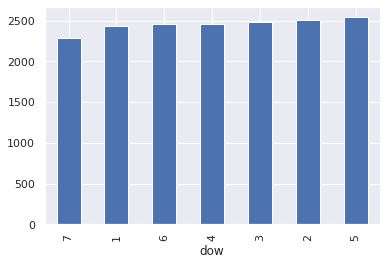

In [172]:
weekly_delhi[['mean_travel_time', 'dow']].groupby(['dow']).mean().sort_values("mean_travel_time", ascending = True).plot.bar(legend = False)

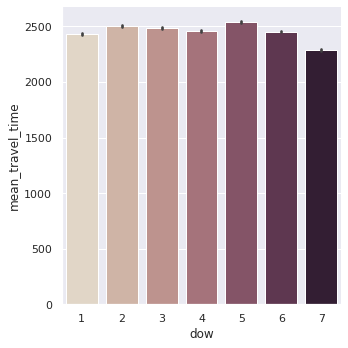

In [173]:
sns.catplot(x='dow',y='mean_travel_time',kind='bar', palette = "ch: 0.25", data = weekly_delhi,aspect=1)


In [177]:
monthly_delhi = pd.read_csv('new_delhi-wards-2019-1-All-MonthlyAggregate.csv')
monthly_delhi.head

<bound method NDFrame.head of         sourceid  ...  geometric_standard_deviation_travel_time
0            170  ...                                      1.72
1            173  ...                                      1.44
2            172  ...                                      1.48
3            180  ...                                      1.35
4            190  ...                                      1.27
...          ...  ...                                       ...
209273        38  ...                                      1.40
209274       213  ...                                      1.31
209275        79  ...                                      1.28
209276       114  ...                                      1.32
209277       240  ...                                      1.41

[209278 rows x 7 columns]>

In [178]:
monthly_delhi.shape

(209278, 7)

In [180]:
monthly_delhi.dtypes

sourceid                                      int64
dstid                                         int64
month                                         int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
dtype: object

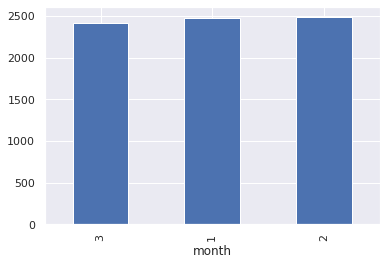

In [181]:
monthly_delhi[['mean_travel_time', 'month']].groupby(['month']).mean().sort_values("mean_travel_time", ascending = True).plot.bar(legend = False)

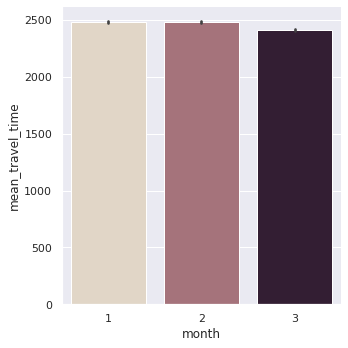

In [182]:
sns.catplot(x='month',y='mean_travel_time',kind='bar', palette = "ch: 0.25", data = monthly_delhi,aspect=1)
